# Model eXtreme Gradient Boosting

- Several columns were dropped.
- Weighted model more complex.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Mental_1 = pd.read_csv('Datasheet/MH.Clean.1.csv')

In [5]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
import sklearn as sk
import xgboost as xgb
from xgboost import XGBClassifier

### Data for train the model

In [7]:
X = Mental_1.drop(columns=['id', 'Depression'],axis=1)
y = Mental_1['Depression']

In [9]:
# define de model
model_stu = XGBClassifier()

In [11]:
# check the param of the model
model_stu.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [13]:
# modification of the param
params = {'base_score': [0.5, 0.7],
         'booster': ['gbtree'],
         'colsample_bylevel': [1],
         'colsample_bynode': [0.6],
         'colsample_bytree': [0.7],
         'gamma': [0.01],
         'learning_rate': [0.05,0.02],
         'max_depth':[2,3,4,5],
         'min_child_weight': [1,3],
         'n_estimators': [400,600],
         'n_jobs': [-1],
         'reg_alpha': [0.1],
         'reg_lambda': [0.01,0.1],
         'scale_pos_weight': [1],
         'subsample': [0.7,0.9]}

In [15]:
scoring = ["roc_auc"]
grid_solver = GridSearchCV(estimator = model_stu,
                   param_grid = params,
                   scoring = scoring,
                   cv = 5,
                   n_jobs=-1,
                   refit="roc_auc",
                   verbose = 2)

In [17]:
# searchin for the best tree.
stu_results = grid_solver.fit(X,y)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
[CV] END base_score=0.5, booster=gbtree, colsample_bylevel=1, colsample_bynode=0.6, colsample_bytree=0.7, gamma=0.01, learning_rate=0.05, max_depth=2, min_child_weight=1, n_estimators=400, n_jobs=-1, reg_alpha=0.1, reg_lambda=0.01, scale_pos_weight=1, subsample=0.9; total time=   1.3s
[CV] END base_score=0.5, booster=gbtree, colsample_bylevel=1, colsample_bynode=0.6, colsample_bytree=0.7, gamma=0.01, learning_rate=0.05, max_depth=2, min_child_weight=1, n_estimators=400, n_jobs=-1, reg_alpha=0.1, reg_lambda=0.01, scale_pos_weight=1, subsample=0.9; total time=   1.4s
[CV] END base_score=0.5, booster=gbtree, colsample_bylevel=1, colsample_bynode=0.6, colsample_bytree=0.7, gamma=0.01, learning_rate=0.05, max_depth=2, min_child_weight=1, n_estimators=400, n_jobs=-1, reg_alpha=0.1, reg_lambda=0.01, scale_pos_weight=1, subsample=0.9; total time=   1.4s
[CV] END base_score=0.5, booster=gbtree, colsample_bylevel=1, colsample_bynode

In [19]:
stu_results.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=0.6, colsample_bytree=0.7,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.01,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=600, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [21]:
dep_resoult = stu_results.best_estimator_

In [23]:
y_pred_V1_bin = dep_resoult.predict(X)
y_pred_V1_bin

array([0, 1, 0, ..., 0, 0, 1])

In [ ]:
threshold = 0.5
y_pred_V1_bin = np.where(y_pred_V1 > threshold, 1, 0)
y_pred_V1_bin

In [25]:
from sklearn.metrics import confusion_matrix

def confusion(ytest,y_pred):
    names=["No depresive","Depressive"]
    cm=confusion_matrix(y,y_pred_V1_bin)
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return

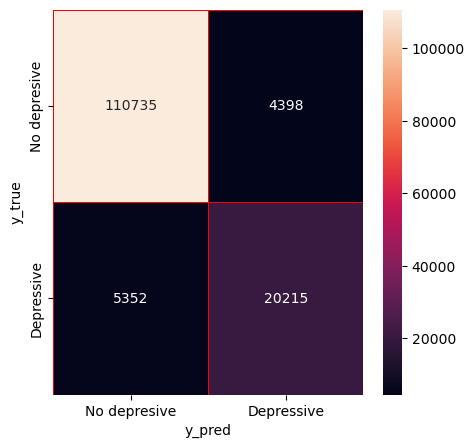

In [27]:
confusion(y,y_pred_V1_bin)

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred_V1_bin)

0.9307036247334755

new options, but only a 2 per thousand on accuracy score.

In [ ]:
grid_solver.best_estimator_

# apply the best estimator to Test dataframe

In [ ]:
Mental_1 = pd.read_csv('Datasheet/MH.Clean.Test.1.csv')

In [ ]:
Mental_1.drop(columns=['id'],axis=1)

In [ ]:
modelo_MH = model_result.best_estimator_

In [ ]:
modelo_MH

In [ ]:
y_pre = modelo_MH.predict(Mental_1.drop(columns=['id'],axis=1))

In [ ]:
y_pre

In [ ]:
# define a threshold
threshold = 0.5
y_pre_bin = np.where(y_pre > threshold, 1, 0)

In [ ]:
y_pre_bin

In [ ]:
Mental_1['Depression']= y_pre_bin

In [ ]:
Mental_1

In [ ]:
Mental_1['Depression'].value_counts()

In [ ]:
print(Mental_1.keys())

In [ ]:
sample_submission = Mental_1.drop(columns=['Gender', 'Age', 'Have you ever had suicidal thoughts ?',
       'Work/Study Hours', 'Financial Stress','Family History of Mental Illness', 'Pressure', 'Satisfaction'],axis=1)

In [ ]:
sample_submission

In [ ]:
sample_submission.to_csv('sample_submission_1.csv', index=False)